Exploratory Data Analysis (15)

• Summarize data: record counts, missing values, and schema

• Visualize the raw dataset using charts and tables (line/bar charts, q-q plots, heatmaps, violin, etc.)

• Structured Data: Perform univariate and bivariate analysis of the features

• Image Data: Histograms, samples, outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("flight_data_2021.csv")
df

,Airline,Origin,Dest,Cancelled,Quarter,Month,DayOfWeek,Operated_or_Branded_Code_Share_Partners,DepDelayMinutes,OriginState,...,arr-type,arr-elevation_ft,Route_Popularity,Distance_Final,Wind_Speed_mph,Wind_Gust_mph,Visibility_miles,tempF,precip_in,daily_snow_in
0,SkyWest Airlines Inc.,SGU,PHX,False,1,3,3,AA_CODESHARE,0.0,UT,...,large_airport,1135.0,937.0,422.246813,10.0,17.0,6.0,49,0.0,0.0
1,SkyWest Airlines Inc.,PHX,SGU,False,1,3,3,AA_CODESHARE,0.0,AZ,...,medium_airport,2941.0,937.0,422.246813,6.0,9.0,6.0,60,0.0,0.0
2,SkyWest Airlines Inc.,MHT,ORD,False,1,3,3,AA_CODESHARE,0.0,NH,...,large_airport,672.0,918.0,1356.657710,10.0,18.0,6.0,39,0.0,0.0
3,SkyWest Airlines Inc.,DFW,TRI,False,1,3,3,AA_CODESHARE,0.0,TX,...,large_airport,1519.0,568.0,1396.572313,10.0,16.0,6.0,65,0.0,0.0
4,SkyWest Airlines Inc.,PHX,BFL,False,1,3,3,AA_CODESHARE,0.0,AZ,...,medium_airport,510.0,1135.0,684.252343,21.0,35.0,6.0,71,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967951,Southwest Airlines Co.,BNA,MDW,False,2,6,2,WN,6.0,TN,...,large_airport,620.0,5936.0,635.353586,6.0,11.0,6.0,77,0.0,0.0
5967952,Southwest Airlines Co.,BNA,MDW,False,2,6,2,WN,0.0,TN,...,large_airport,620.0,5936.0,635.353586,4.0,7.0,6.0,65,0.0,0.0
5967953,Southwest Airlines Co.,BNA,MIA,False,2,6,2,WN,0.0,TN,...,large_airport,8.0,1771.0,1297.028886,5.0,10.0,6.0,67,0.0,0.0
5967954,Southwest Airlines Co.,BNA,MIA,False,2,6,2,WN,0.0,TN,...,large_airport,8.0,1771.0,1297.028886,6.0,12.0,6.0,78,0.0,0.0


In [3]:
df.shape

(5967956, 24)

In [4]:
df.isnull().sum()

Airline                                    0
Origin                                     0
Dest                                       0
Cancelled                                  0
Quarter                                    0
Month                                      0
DayOfWeek                                  0
Operated_or_Branded_Code_Share_Partners    0
DepDelayMinutes                            0
OriginState                                0
DestState                                  0
DepTimeBlk                                 0
dept-type                                  0
dept-elevation_ft                          0
arr-type                                   0
arr-elevation_ft                           0
Route_Popularity                           0
Distance_Final                             0
Wind_Speed_mph                             0
Wind_Gust_mph                              0
Visibility_miles                           0
tempF                                      0
precip_in 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967956 entries, 0 to 5967955
Data columns (total 24 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Airline                                  object 
 1   Origin                                   object 
 2   Dest                                     object 
 3   Cancelled                                bool   
 4   Quarter                                  int64  
 5   Month                                    int64  
 6   DayOfWeek                                int64  
 7   Operated_or_Branded_Code_Share_Partners  object 
 8   DepDelayMinutes                          float64
 9   OriginState                              object 
 10  DestState                                object 
 11  DepTimeBlk                               object 
 12  dept-type                                object 
 13  dept-elevation_ft                        float64
 14  arr-type          

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category', "bool"]).columns
numerical_cols = df.select_dtypes(include=['number']).columns

num_categorical = len(categorical_cols)
num_numerical = len(numerical_cols)

In [7]:
num_categorical

10

In [8]:
categorical_cols

Index(['Airline', 'Origin', 'Dest', 'Cancelled',
       'Operated_or_Branded_Code_Share_Partners', 'OriginState', 'DestState',
       'DepTimeBlk', 'dept-type', 'arr-type'],
      dtype='object')

In [9]:
num_numerical

14

In [10]:
numerical_cols

Index(['Quarter', 'Month', 'DayOfWeek', 'DepDelayMinutes', 'dept-elevation_ft',
       'arr-elevation_ft', 'Route_Popularity', 'Distance_Final',
       'Wind_Speed_mph', 'Wind_Gust_mph', 'Visibility_miles', 'tempF',
       'precip_in', 'daily_snow_in'],
      dtype='object')

Text(0, 0.5, 'Origin')

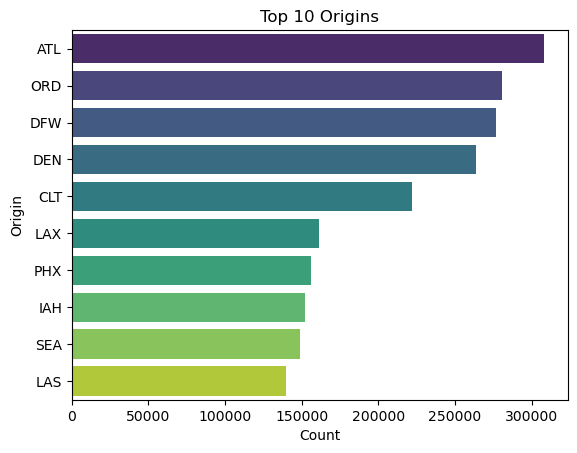

In [11]:
# Count the occurrences of each origin and destination
top_origins = df['Origin'].value_counts().head(10)
top_destinations = df['Dest'].value_counts().head(10)

# Plot the top 10 origins
sns.barplot(x=top_origins.values, y=top_origins.index, palette='viridis')
plt.title('Top 10 Origins')
plt.xlabel('Count')
plt.ylabel('Origin')

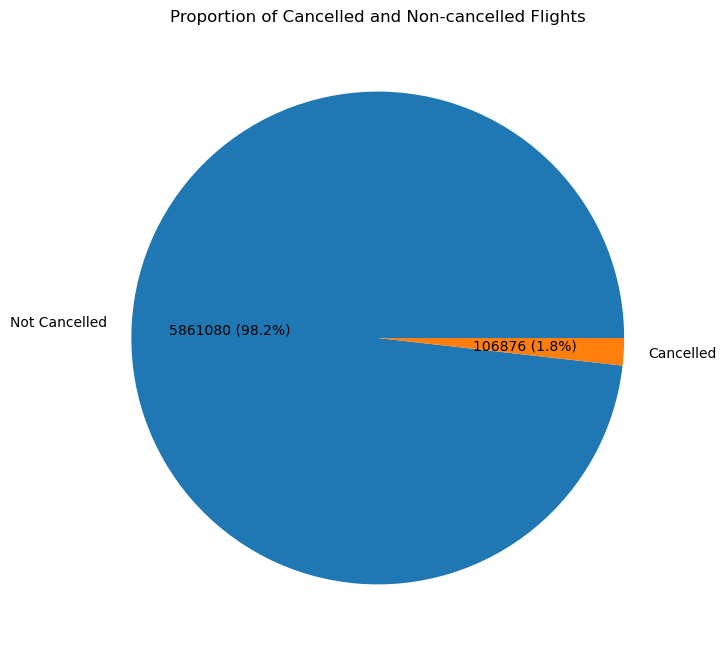

In [12]:
cancelled_counts = df['Cancelled'].value_counts()

# Labels for the pie chart
labels = ['Not Cancelled', 'Cancelled']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cancelled_counts, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(cancelled_counts) / 100, p))
plt.title('Proportion of Cancelled and Non-cancelled Flights')
plt.show()

In [13]:
df["Delayed"] = df["DepDelayMinutes"] > 0

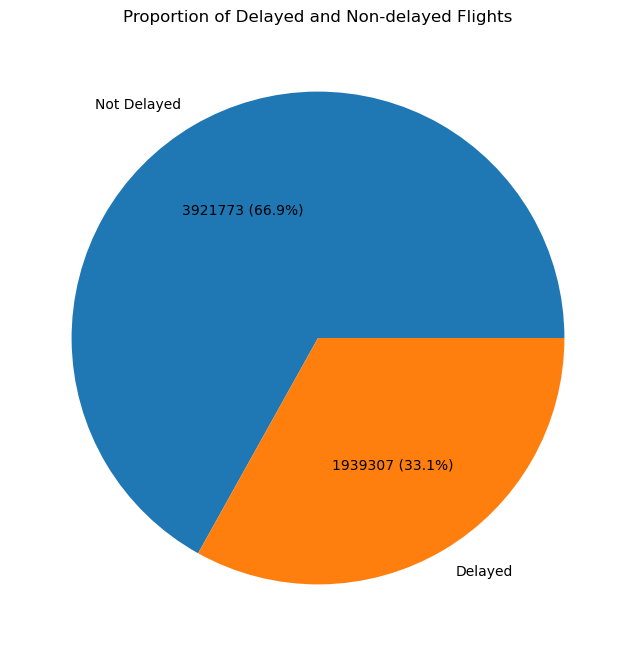

In [14]:
delayed_counts = df[df["Cancelled"] == False]["Delayed"].value_counts()

# Labels for the pie chart
labels = ['Not Delayed', 'Delayed']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(delayed_counts, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(delayed_counts) / 100, p))
plt.title('Proportion of Delayed and Non-delayed Flights')
plt.show()

In [15]:
df.columns

Index(['Airline', 'Origin', 'Dest', 'Cancelled', 'Quarter', 'Month',
       'DayOfWeek', 'Operated_or_Branded_Code_Share_Partners',
       'DepDelayMinutes', 'OriginState', 'DestState', 'DepTimeBlk',
       'dept-type', 'dept-elevation_ft', 'arr-type', 'arr-elevation_ft',
       'Route_Popularity', 'Distance_Final', 'Wind_Speed_mph', 'Wind_Gust_mph',
       'Visibility_miles', 'tempF', 'precip_in', 'daily_snow_in', 'Delayed'],
      dtype='object')

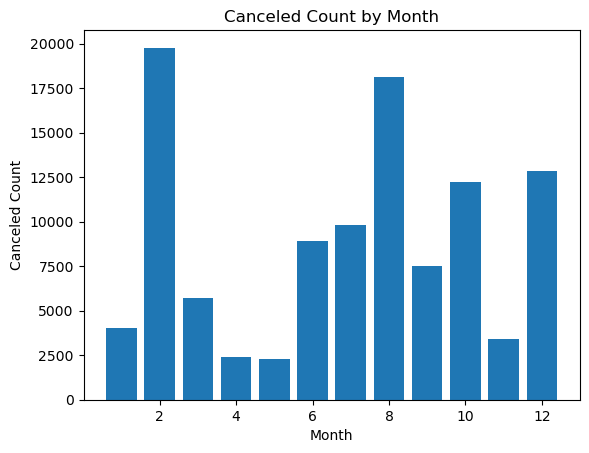

In [22]:
delay_month = df.groupby("Month")["Cancelled"].sum().reset_index()
plt.bar(delay_month["Month"], delay_month["Cancelled"])
plt.xlabel("Month")
plt.ylabel("Canceled Count")
plt.title("Canceled Count by Month");

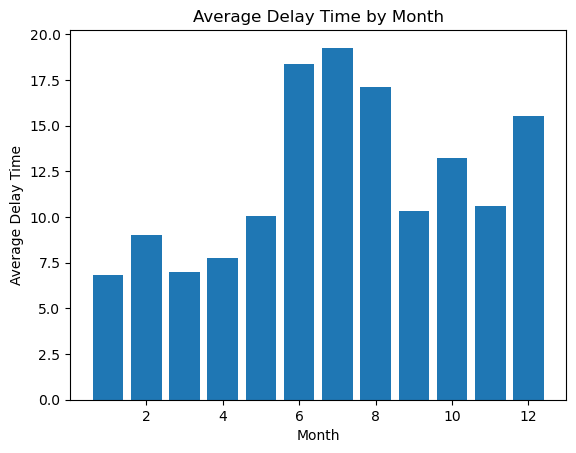

In [20]:
delay_month = df.groupby("Month")["DepDelayMinutes"].mean().reset_index()
plt.bar(delay_month["Month"], delay_month["DepDelayMinutes"])
plt.xlabel("Month")
plt.ylabel("Average Delay Time")
plt.title("Average Delay Time by Month");

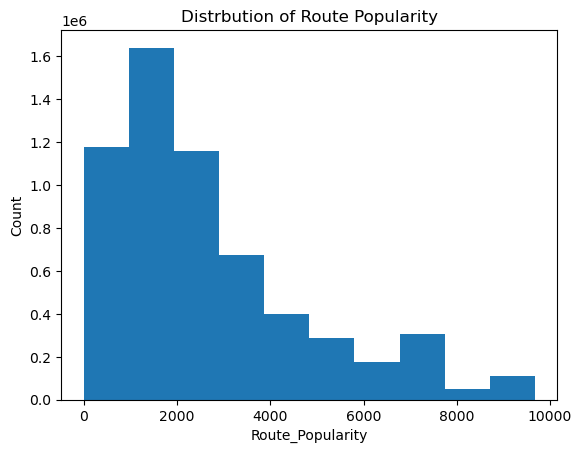

In [39]:
plt.hist(df["Route_Popularity"])
plt.xlabel("Route_Popularity")
plt.ylabel("Count")
plt.title("Distrbution of Route Popularity");

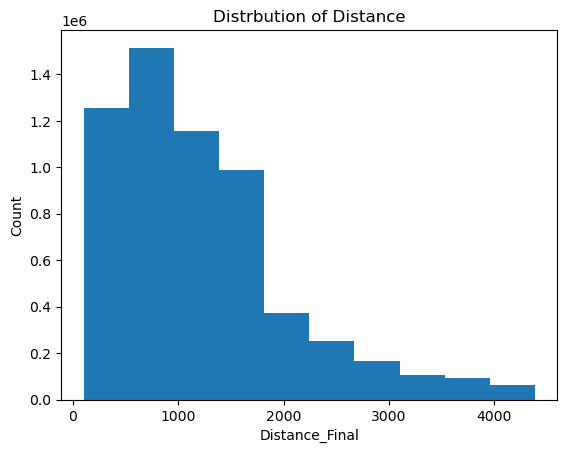

In [40]:
plt.hist(df["Distance_Final"])
plt.xlabel("Distance_Final")
plt.ylabel("Count")
plt.title("Distrbution of Distance");

In [36]:
df.describe()

,Quarter,Month,DayOfWeek,DepDelayMinutes,dept-elevation_ft,arr-elevation_ft,Route_Popularity,Distance_Final,Wind_Speed_mph,Wind_Gust_mph,Visibility_miles,tempF,precip_in,daily_snow_in
count,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06,5.967956e+06
mean,2.650825e+00,6.972018e+00,4.011478e+00,1.260587e+01,9.535930e+02,9.534385e+02,2.669289e+03,1.219444e+03,7.519541e+00,1.291383e+01,5.637721e+00,6.445136e+01,3.807786e-03,3.356484e-02
std,1.079365e+00,3.305266e+00,2.006361e+00,4.699223e+01,1.423327e+03,1.423395e+03,2.099360e+03,8.322776e+02,4.019286e+00,6.072926e+00,1.014486e+00,1.795399e+01,2.370254e-02,4.098900e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.060019e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.100000e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,6.200000e+01,6.200000e+01,1.122000e+03,5.953437e+02,5.000000e+00,9.000000e+00,6.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00
50%,3.000000e+00,7.000000e+00,4.000000e+00,0.000000e+00,6.070000e+02,6.070000e+02,2.065000e+03,1.017670e+03,7.000000e+00,1.200000e+01,6.000000e+00,6.700000e+01,0.000000e+00,0.000000e+00
75%,4.000000e+00,1.000000e+01,6.000000e+00,5.000000e+00,9.810000e+02,9.810000e+02,3.572000e+03,1.606749e+03,1.000000e+01,1.600000e+01,6.000000e+00,7.800000e+01,0.000000e+00,0.000000e+00
max,4.000000e+00,1.200000e+01,7.000000e+00,3.095000e+03,7.820000e+03,7.820000e+03,9.674000e+03,4.383858e+03,5.900000e+01,8.700000e+01,6.000000e+00,1.150000e+02,1.100000e+00,2.578740e+01


In [15]:
def flight_status(row):
    if row['Cancelled']:
        return 'Cancelled'
    elif row['Delayed']:
        return 'Delayed'
    else:
        return 'Not Delayed'

# Apply the function to create the new column 'Flight_Status'
df['Flight_Status'] = df.apply(flight_status, axis=1)

# Verify the new column
print(df['Flight_Status'].value_counts())

Flight_Status
Not Delayed    3921773
Delayed        1939307
Cancelled       106876
Name: count, dtype: int64


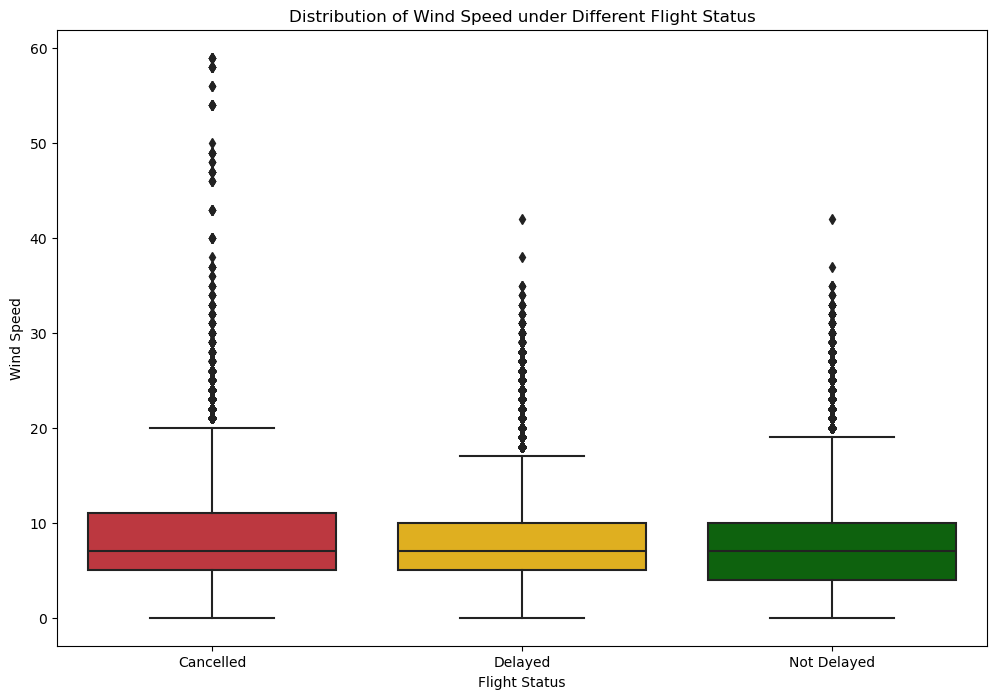

In [25]:
# Filter data for cancelled flights
cancelled_data = df[df['Cancelled'] == True][['Wind_Speed_mph', 'Month']]
cancelled_data['Flight_Status'] = 'Cancelled'

# Filter data for delayed flights
delayed_data = df[(df['Cancelled'] == False) & (df['Delayed'] == True)][['Wind_Speed_mph', 'Month']]
delayed_data['Flight_Status'] = 'Delayed'

# Filter data for not delayed flights
not_delayed_data = df[(df['Cancelled'] == False) & (df['Delayed'] == False)][['Wind_Speed_mph', 'Month']]
not_delayed_data['Flight_Status'] = 'Not Delayed'

# Combine the data into a single DataFrame
combined_data = pd.concat([cancelled_data, delayed_data, not_delayed_data])

# Create the violin plot
plt.figure(figsize=(12, 8))

# Define the color palette
palette = {'Cancelled': '#D2222D', 'Delayed': '#FFBF00', 'Not Delayed': '#007000'}

# Create the violin plot
sns.boxplot(x='Flight_Status', y='Wind_Speed_mph', data=combined_data, palette=palette)

plt.xlabel('Flight Status')
plt.ylabel('Wind Speed')
plt.title('Distribution of Wind Speed under Different Flight Status')
plt.show()


In [23]:
df.columns

Index(['Airline', 'Origin', 'Dest', 'Cancelled', 'Quarter', 'Month',
       'DayOfWeek', 'Operated_or_Branded_Code_Share_Partners',
       'DepDelayMinutes', 'OriginState', 'DestState', 'DepTimeBlk',
       'dept-type', 'dept-elevation_ft', 'arr-type', 'arr-elevation_ft',
       'Route_Popularity', 'Distance_Final', 'Wind_Speed_mph', 'Wind_Gust_mph',
       'Visibility_miles', 'tempF', 'precip_in', 'daily_snow_in', 'Delayed'],
      dtype='object')

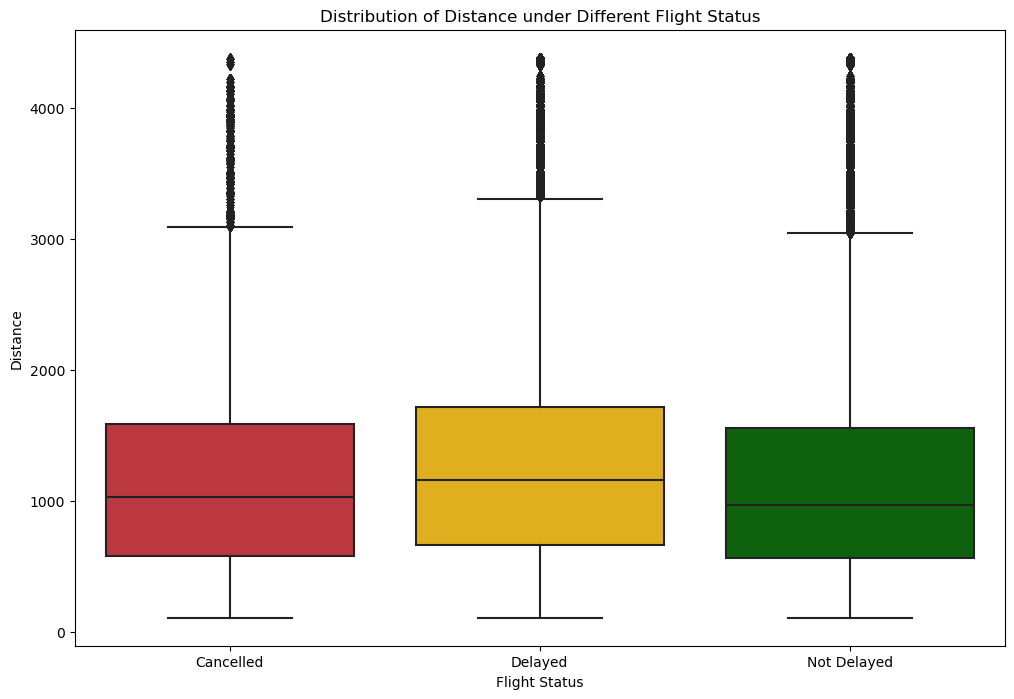

In [25]:
# Filter data for cancelled flights
cancelled_data = df[df['Cancelled'] == True][['Distance_Final', 'Month']]
cancelled_data['Flight_Status'] = 'Cancelled'

# Filter data for delayed flights
delayed_data = df[(df['Cancelled'] == False) & (df['Delayed'] == True)][['Distance_Final', 'Month']]
delayed_data['Flight_Status'] = 'Delayed'

# Filter data for not delayed flights
not_delayed_data = df[(df['Cancelled'] == False) & (df['Delayed'] == False)][['Distance_Final', 'Month']]
not_delayed_data['Flight_Status'] = 'Not Delayed'

# Combine the data into a single DataFrame
combined_data = pd.concat([cancelled_data, delayed_data, not_delayed_data])

# Create the violin plot
plt.figure(figsize=(12, 8))

# Define the color palette
palette = {'Cancelled': '#D2222D', 'Delayed': '#FFBF00', 'Not Delayed': '#007000'}

# Create the violin plot
sns.boxplot(x='Flight_Status', y='Distance_Final', data=combined_data, palette=palette)

plt.xlabel('Flight Status')
plt.ylabel('Distance')
plt.title('Distribution of Distance under Different Flight Status')
plt.show()

Text(0.5, 1.0, 'Distribution of Visibility')

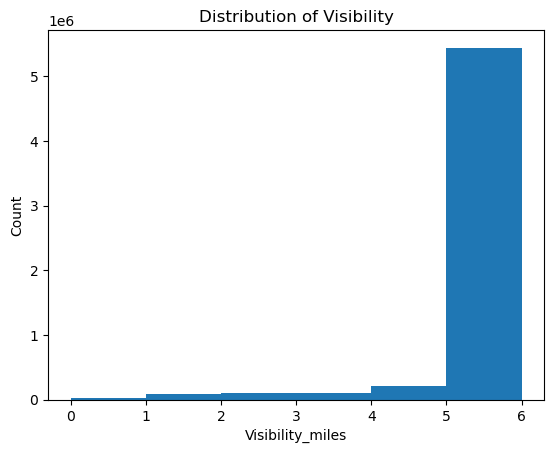

In [31]:
plt.hist(df['Visibility_miles'], bins = 6)
plt.xlabel('Visibility_miles')
plt.ylabel("Count")
plt.title("Distribution of Visibility")

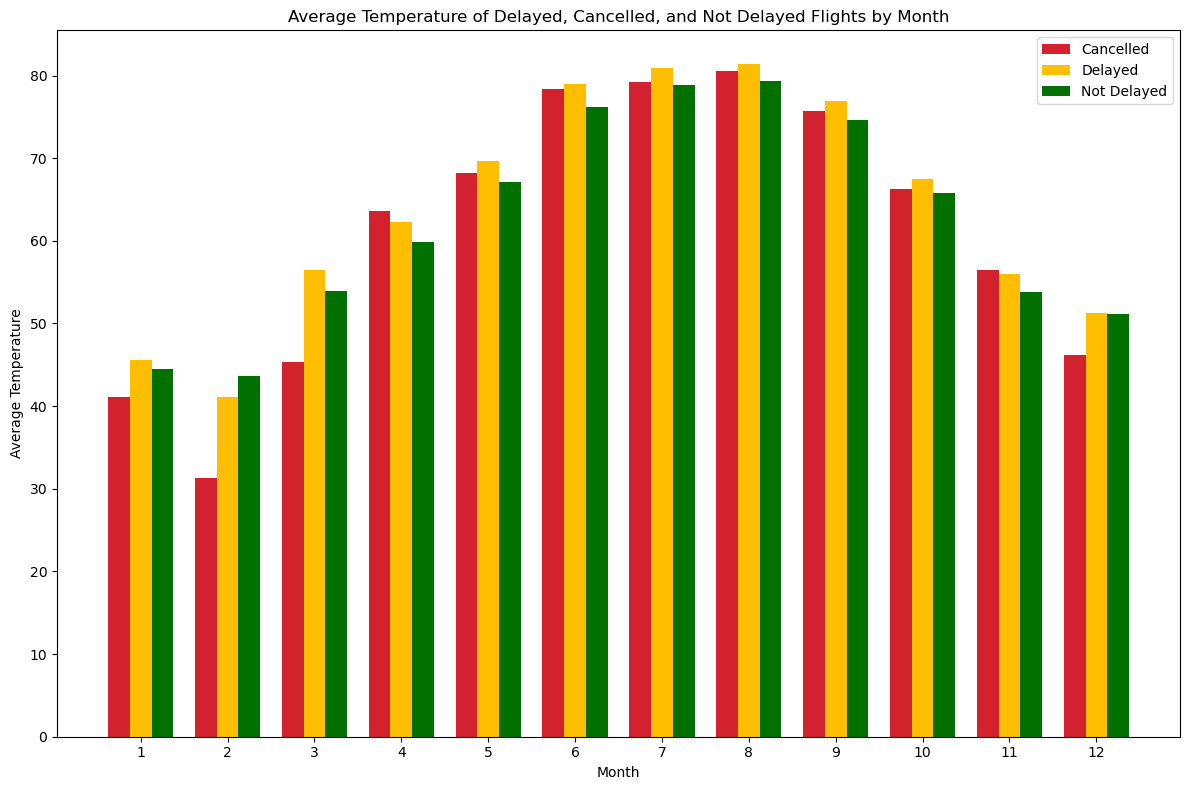

In [26]:
# Calculate average temperature for delayed, cancelled, and not delayed flights for each month
monthly_avg_temp_cancelled = df[df['Flight_Status'] == 'Cancelled'].groupby('Month')['tempF'].mean()
monthly_avg_temp_delayed = df[df['Flight_Status'] == 'Delayed'].groupby('Month')['tempF'].mean()
monthly_avg_temp_not_delayed = df[df['Flight_Status'] == 'Not Delayed'].groupby('Month')['tempF'].mean()

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the number of months
num_months = len(monthly_avg_temp_cancelled.index)

# Set the width of each bar
bar_width = 0.25

# Set the positions for the bars
positions = range(1, num_months + 1)

cancelled_color = '#D2222D'
delayed_color = '#FFBF00'
not_delayed_color = '#007000'

# Plot bars for average temperature of delayed flights
plt.bar(positions, monthly_avg_temp_cancelled, width=bar_width, color=cancelled_color, align='center', label='Cancelled')

# Plot bars for average temperature of cancelled flights
plt.bar([p + bar_width for p in positions], monthly_avg_temp_delayed, width=bar_width, color=delayed_color, align='center', label='Delayed')

# Plot bars for average temperature of not delayed flights
plt.bar([p + 2*bar_width for p in positions], monthly_avg_temp_not_delayed, width=bar_width, color=not_delayed_color, align='center', label='Not Delayed')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature of Delayed, Cancelled, and Not Delayed Flights by Month')
plt.xticks([p + bar_width for p in positions], monthly_avg_temp_cancelled.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

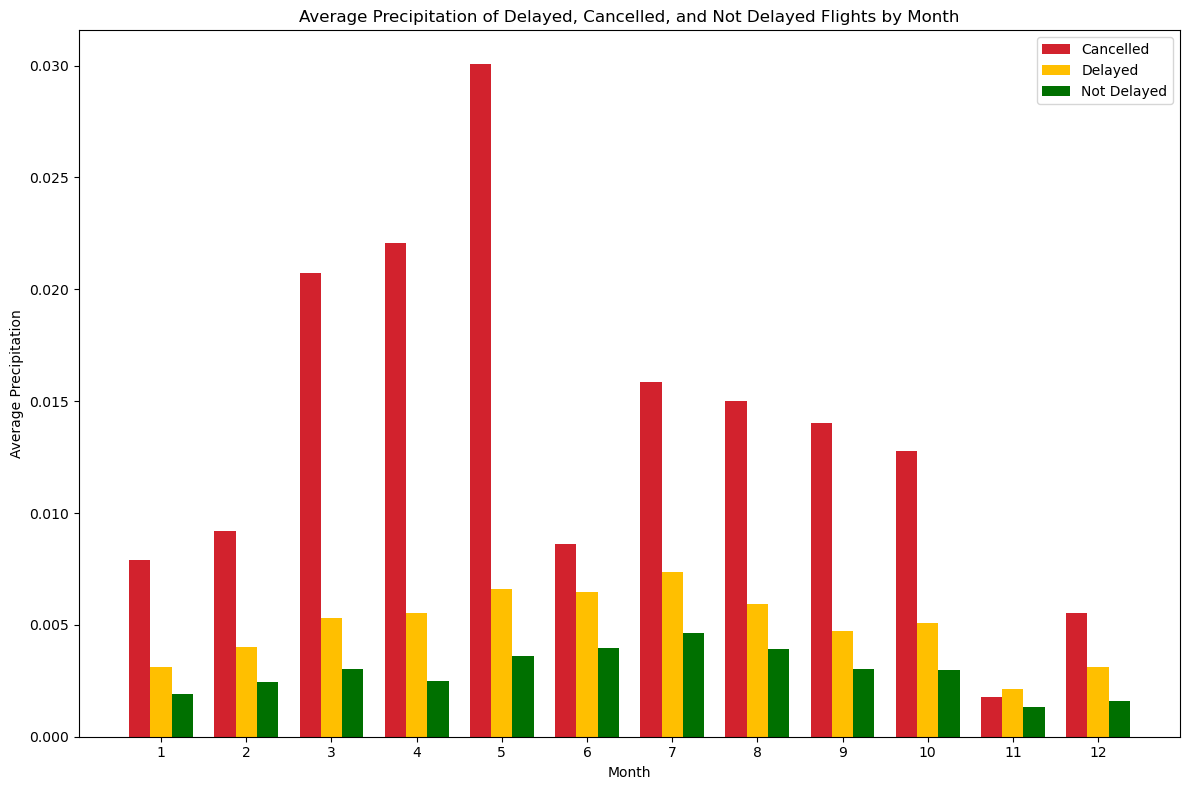

In [17]:
# Calculate average temperature for delayed, cancelled, and not delayed flights for each month
monthly_avg_precip_cancelled = df[df['Flight_Status'] == 'Cancelled'].groupby('Month')['precip_in'].mean()
monthly_avg_precip_delayed = df[df['Flight_Status'] == 'Delayed'].groupby('Month')['precip_in'].mean()
monthly_avg_precip_not_delayed = df[df['Flight_Status'] == 'Not Delayed'].groupby('Month')['precip_in'].mean()

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the number of months
num_months = len(monthly_avg_precip_cancelled.index)

# Set the width of each bar
bar_width = 0.25

# Set the positions for the bars
positions = range(1, num_months + 1)

cancelled_color = '#D2222D'
delayed_color = '#FFBF00'
not_delayed_color = '#007000'

# Plot bars for average temperature of delayed flights
plt.bar(positions, monthly_avg_precip_cancelled, width=bar_width, color=cancelled_color, align='center', label='Cancelled')

# Plot bars for average temperature of cancelled flights
plt.bar([p + bar_width for p in positions], monthly_avg_precip_delayed, width=bar_width, color=delayed_color, align='center', label='Delayed')

# Plot bars for average temperature of not delayed flights
plt.bar([p + 2*bar_width for p in positions], monthly_avg_precip_not_delayed, width=bar_width, color=not_delayed_color, align='center', label='Not Delayed')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation of Delayed, Cancelled, and Not Delayed Flights by Month')
plt.xticks([p + bar_width for p in positions], monthly_avg_precip_cancelled.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

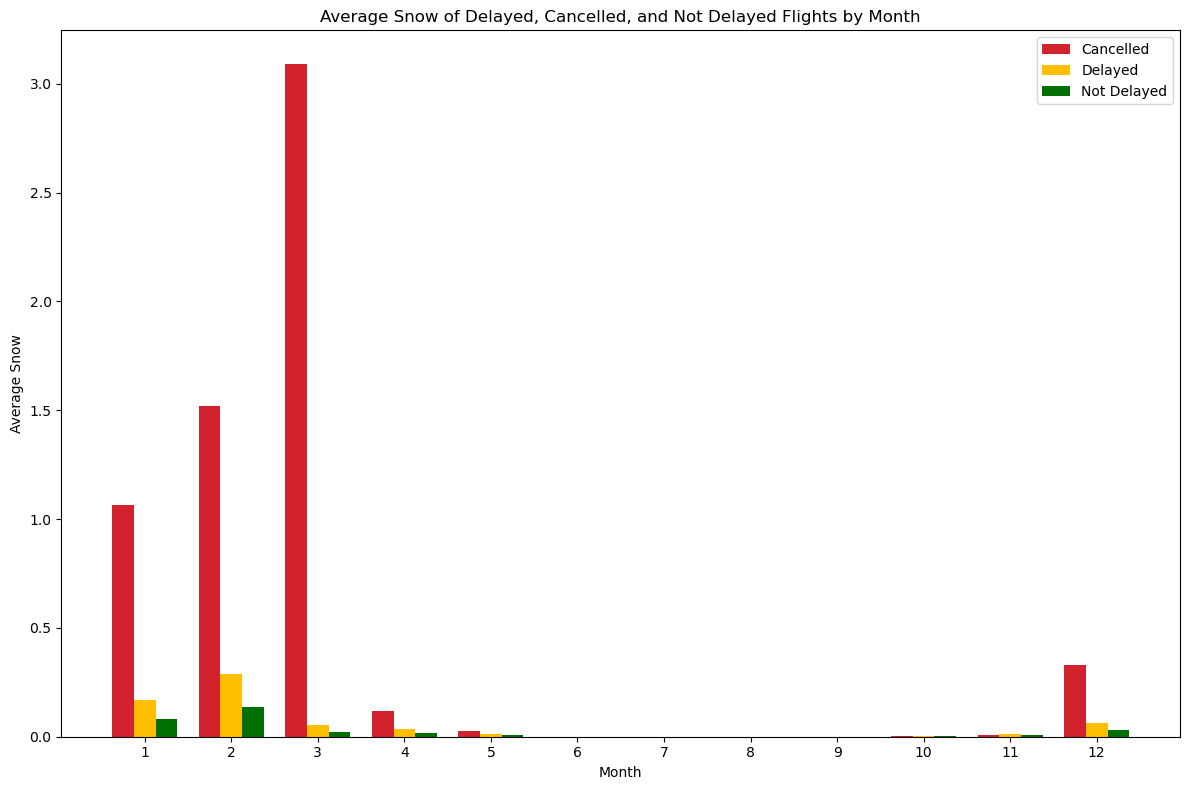

In [19]:
# Calculate average temperature for delayed, cancelled, and not delayed flights for each month
monthly_avg_snow_cancelled = df[df['Flight_Status'] == 'Cancelled'].groupby('Month')['daily_snow_in'].mean()
monthly_avg_snow_delayed = df[df['Flight_Status'] == 'Delayed'].groupby('Month')['daily_snow_in'].mean()
monthly_avg_snow_not_delayed = df[df['Flight_Status'] == 'Not Delayed'].groupby('Month')['daily_snow_in'].mean()

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the number of months
num_months = len(monthly_avg_snow_cancelled.index)

# Set the width of each bar
bar_width = 0.25

# Set the positions for the bars
positions = range(1, num_months + 1)

cancelled_color = '#D2222D'
delayed_color = '#FFBF00'
not_delayed_color = '#007000'

# Plot bars for average temperature of delayed flights
plt.bar(positions, monthly_avg_snow_cancelled, width=bar_width, color=cancelled_color, align='center', label='Cancelled')

# Plot bars for average temperature of cancelled flights
plt.bar([p + bar_width for p in positions], monthly_avg_snow_delayed, width=bar_width, color=delayed_color, align='center', label='Delayed')

# Plot bars for average temperature of not delayed flights
plt.bar([p + 2*bar_width for p in positions], monthly_avg_snow_not_delayed, width=bar_width, color=not_delayed_color, align='center', label='Not Delayed')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Average Snow')
plt.title('Average Snow of Delayed, Cancelled, and Not Delayed Flights by Month')
plt.xticks([p + bar_width for p in positions], monthly_avg_snow_cancelled.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()